***Exploratory Data Analysis***

**Introduction**

This notebook contains the results of the data analysis performed on a set of corporate credit ratings given by ratings agencies to a set of companies. The aim of the data analysis is to build a machine learning model from the rating data that can be used to predict the rating a company will receive.

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:
- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

**A Brief Look: The Dataset**

There are 30 features for every company of which 25 are financial indicators, the ID column is what we added for sample splitting. They can be divided in:
1. Liquidity Measurement Ratios: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding
2. Profitability Indicator Ratios: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed
3. Debt Ratios: debtRatio, debtEquityRatio
4. Operating Performance Ratios: assetTurnover
5. Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio

In [1]:
import pandas as pd
import numpy as np
from _load_data import load_data
from plotting import count_of_rating, hist, pairwise, box_distribution, sector,boxplot_for_outlier, correlation_map
from preprocessing import encoder
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/Users/xichuqing/Desktop/cambridge/D100/D100-D400_credit_prediction
/Users/xichuqing/Desktop/cambridge/D100/D100-D400_credit_prediction


In [2]:
#load the data
df = load_data()
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,ID
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,1
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,2
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,03/06/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,3
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,4
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,5


In [3]:
# Display the dimensions
print("The credit rating dataset has", df.shape[0], "records, each with", df.shape[1],
    "attributes")
# Display the structure
df.info()

The credit rating dataset has 2029 records, each with 32 attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029

In [4]:
# Statistical summary 
df.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,ID
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,1015.000000
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,585.866168
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,1.000000
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,508.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,1015.000000
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,1522.000000
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,2029.000000


This 50% of the currentRatio between 1.071 and 2.166891. The minimum value is -0.932005 however the maximum value is 1725.505005. It means, in other words, there is a giant outlier that is extremely distant from most points from the data (currentRatio).The same pattern can be observed in the following columns such as quickRatio, cashRatio, daysOfSalesOutstanding, netProfitMargin and so on.

We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The summary reveals no missing values across the columns. Each feature is properly defined with numerical (float64) or categorical (object) data types. However, numerical features exhibit large ranges, suggesting potential outliers. We will investigate them later.



**Skewness and Outliers**

As we know we are working with ordinal labels. That means there is a scale from more secure to less secure ratings. Let's have a first look at the how many ratings we have of each in the dataset.

The distribution of the Rating column was visualized using a bar chart. The chart highlights an imbalance in credit ratings:
1. "Medium Risk" and "Low Risk" ratings dominate the dataset.
2. Very few instances belong to "Lowest Risk" and "In Default" categories.

Unfortunately, given the lack of Credit Ratings classified as Lowest Risk and In Default we will have to eliminate then from the table. However, the dataset will keep unbalanced and if needed we will have to adress this issue in further steps.

Rating
High Risk       792
Medium Risk     671
Low Risk        487
Highest Risk     71
Lowest Risk       7
In Default        1
Name: count, dtype: int64

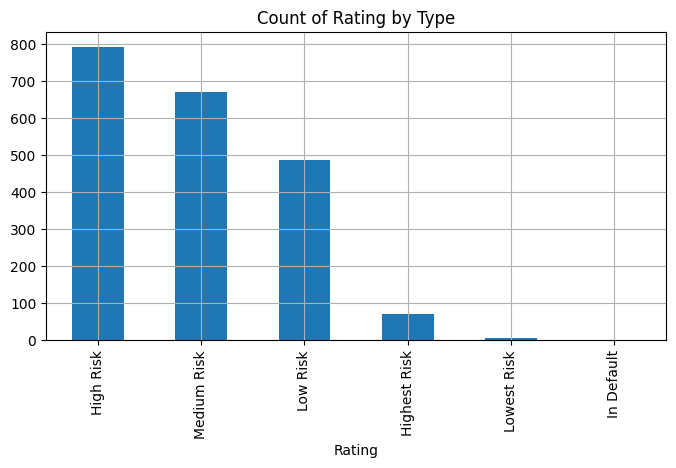

In [5]:
ax = count_of_rating(df)
df.Rating.value_counts()


We observe skewness in the data with this first exploration. In this case, it means that most variables in the dataset may strong presence of outliers. To observe how this reflect on the distribution of the data lets make some plots of variables chose randomly.


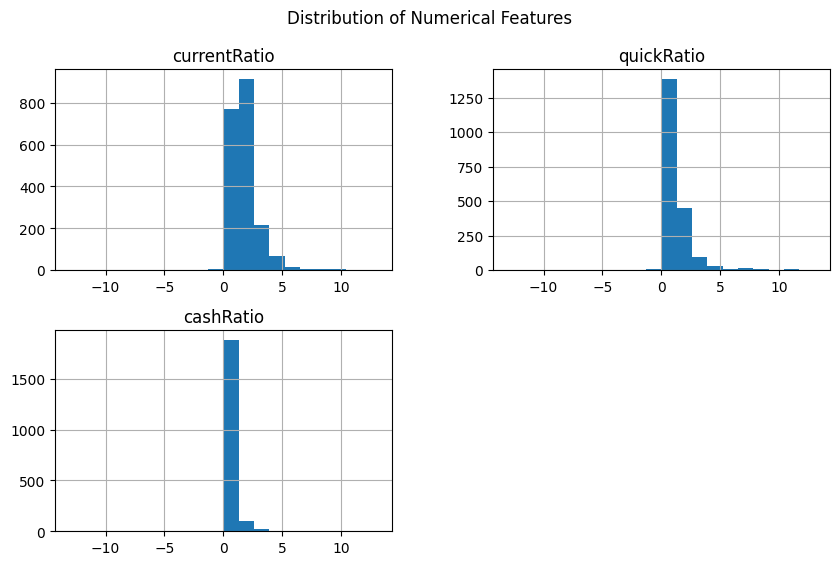

In [6]:
# histogram for the selected numerical features
hist = hist(df)

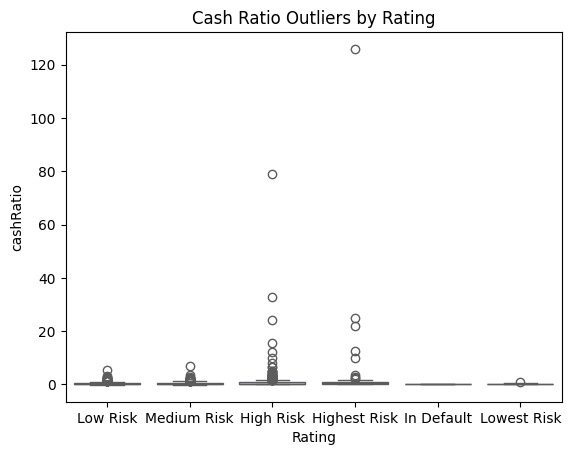

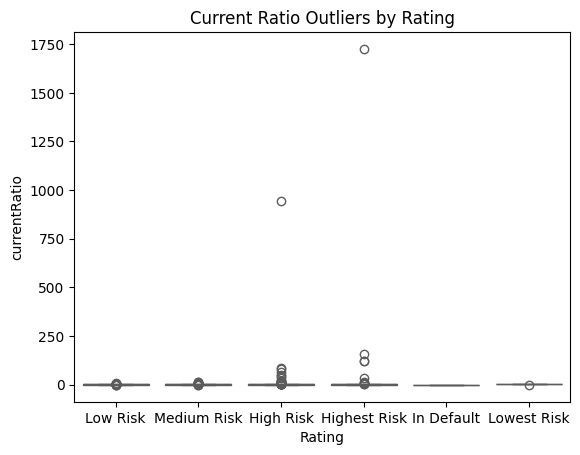

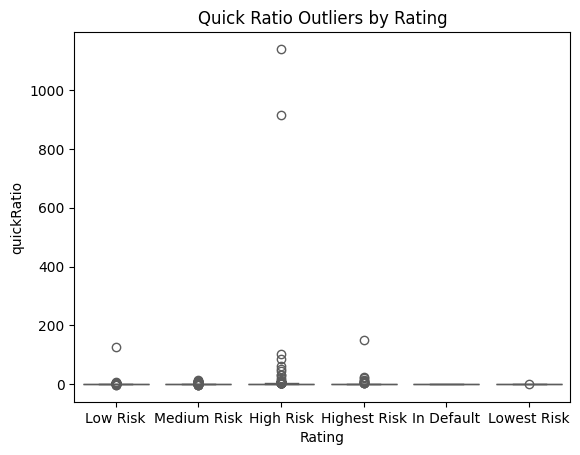

In [7]:
# boxplot of the selected numerical features, classified by the rating
abc= boxplot_for_outlier(df)


Histograms were generated for selected numerical columns like currentRatio, cashRatio, and daysOfSalesOutstanding. Most features exhibit skewed distributions, meaning that a small number of companies have extremely high values. currentRatio has most values concentrated between 1 and 3, but outliers extend to 1700+. Features like daysOfSalesOutstanding and cashRatio show extreme values far from the main distribution.

As can be seen in the boxplots, the higher the risk, more likely to have outliers.

We can apply log transformation to reduce skewness and cap outliers using Interquartile Range (IQR)-based Winsorization.


**Relations between the Predictors**

The distribution of the Sector column was analyzed, showing a balanced representation across different sectors.
The chart highlights sector-specific financial stability and risk distribution. Sectors such as Energy and Basic Industries face elevated financial risk, while Public Utilities and parts of Consumer Services demonstrate more moderate and stable performance. Technology exhibits diversity, with companies spread across all rating levels, including Default. 

These trends suggest that sector-specific risks should be analyzed further when building financial models or assessing credit risk. We can encode the Sector column numerically using label encoding for machine learning.


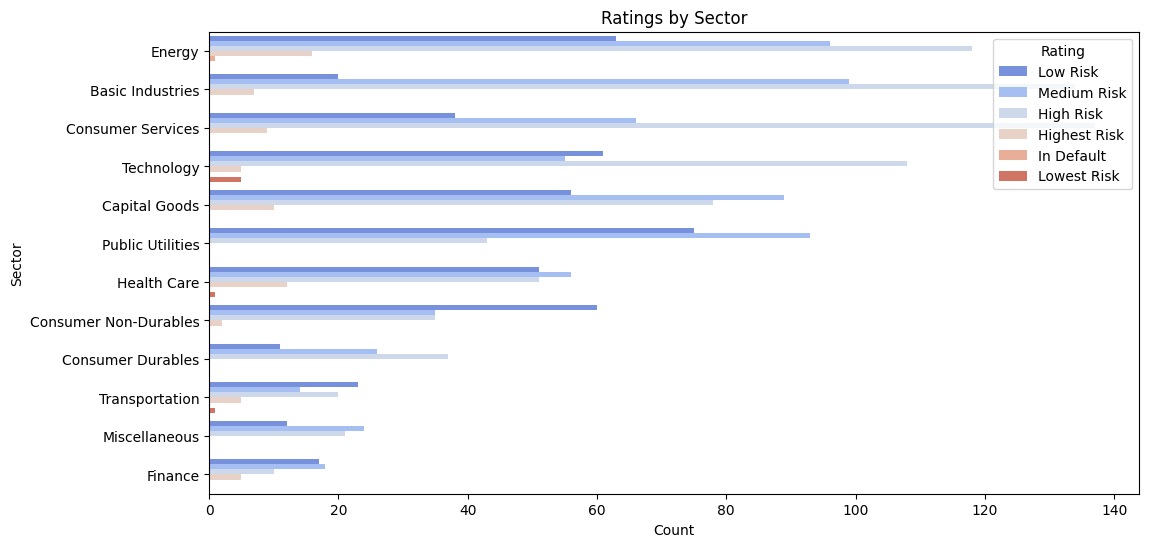

In [8]:
# ratings by sector
sector = sector(df)

Sector encoding mapping: {0: 'Basic Industries', 1: 'Capital Goods', 2: 'Consumer Durables', 3: 'Consumer Non-Durables', 4: 'Consumer Services', 5: 'Energy', 6: 'Finance', 7: 'Health Care', 8: 'Miscellaneous', 9: 'Public Utilities', 10: 'Technology', 11: 'Transportation'}


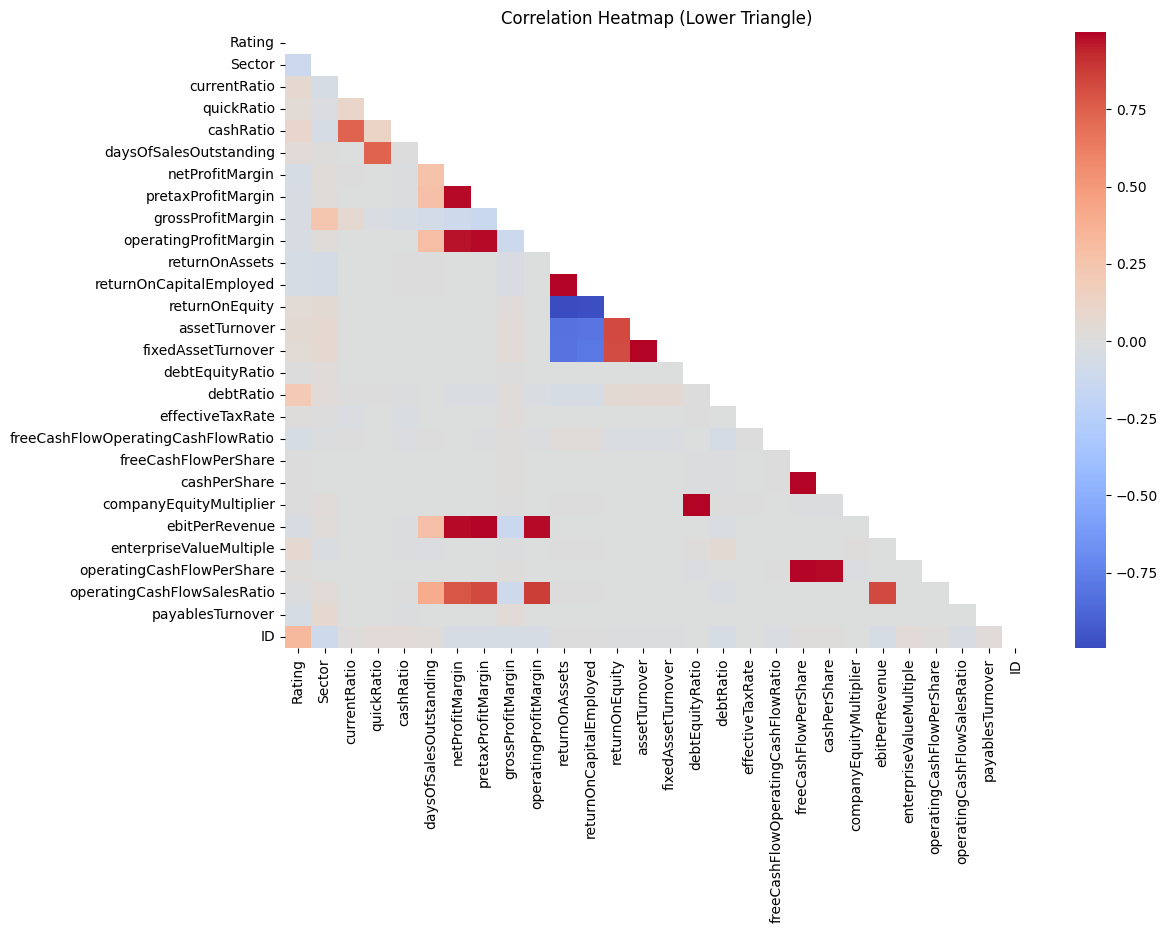

Rating                                1.000000
Sector                               -0.123218
currentRatio                          0.067088
quickRatio                            0.041715
cashRatio                             0.100854
daysOfSalesOutstanding                0.035404
netProfitMargin                      -0.047277
pretaxProfitMargin                   -0.044281
grossProfitMargin                    -0.038733
operatingProfitMargin                -0.038405
returnOnAssets                       -0.049108
returnOnCapitalEmployed              -0.049957
returnOnEquity                        0.047656
assetTurnover                         0.049139
fixedAssetTurnover                    0.048512
debtEquityRatio                       0.007975
debtRatio                             0.211640
effectiveTaxRate                      0.015655
freeCashFlowOperatingCashFlowRatio   -0.048515
freeCashFlowPerShare                  0.009004
cashPerShare                          0.008645
companyEquity

In [9]:
# heatmap for correlations of all variables
df1 = encoder(df)
correlation_map = correlation_map(df1)


We can observe the relations between Rating and other variables from the coefficient column we extract.
The heatmap visualized the correlation matrix of all numerical features. Notable patterns include:
1. High Positive Correlations:
grossProfitMargin and operatingProfitMargin have strong correlations, indicating that these features capture similar profitability insights.
2. Weak Correlations with Target Variable (Rating):
Features like operatingCashFlowSalesRatio and companyEquityMultiplier show weak relationships with the target variable, suggesting limited predictive power.

We consider to remove or combine highly correlated features to reduce redundancy and furtherly investigate weak correlations with the target variable for feature selection.


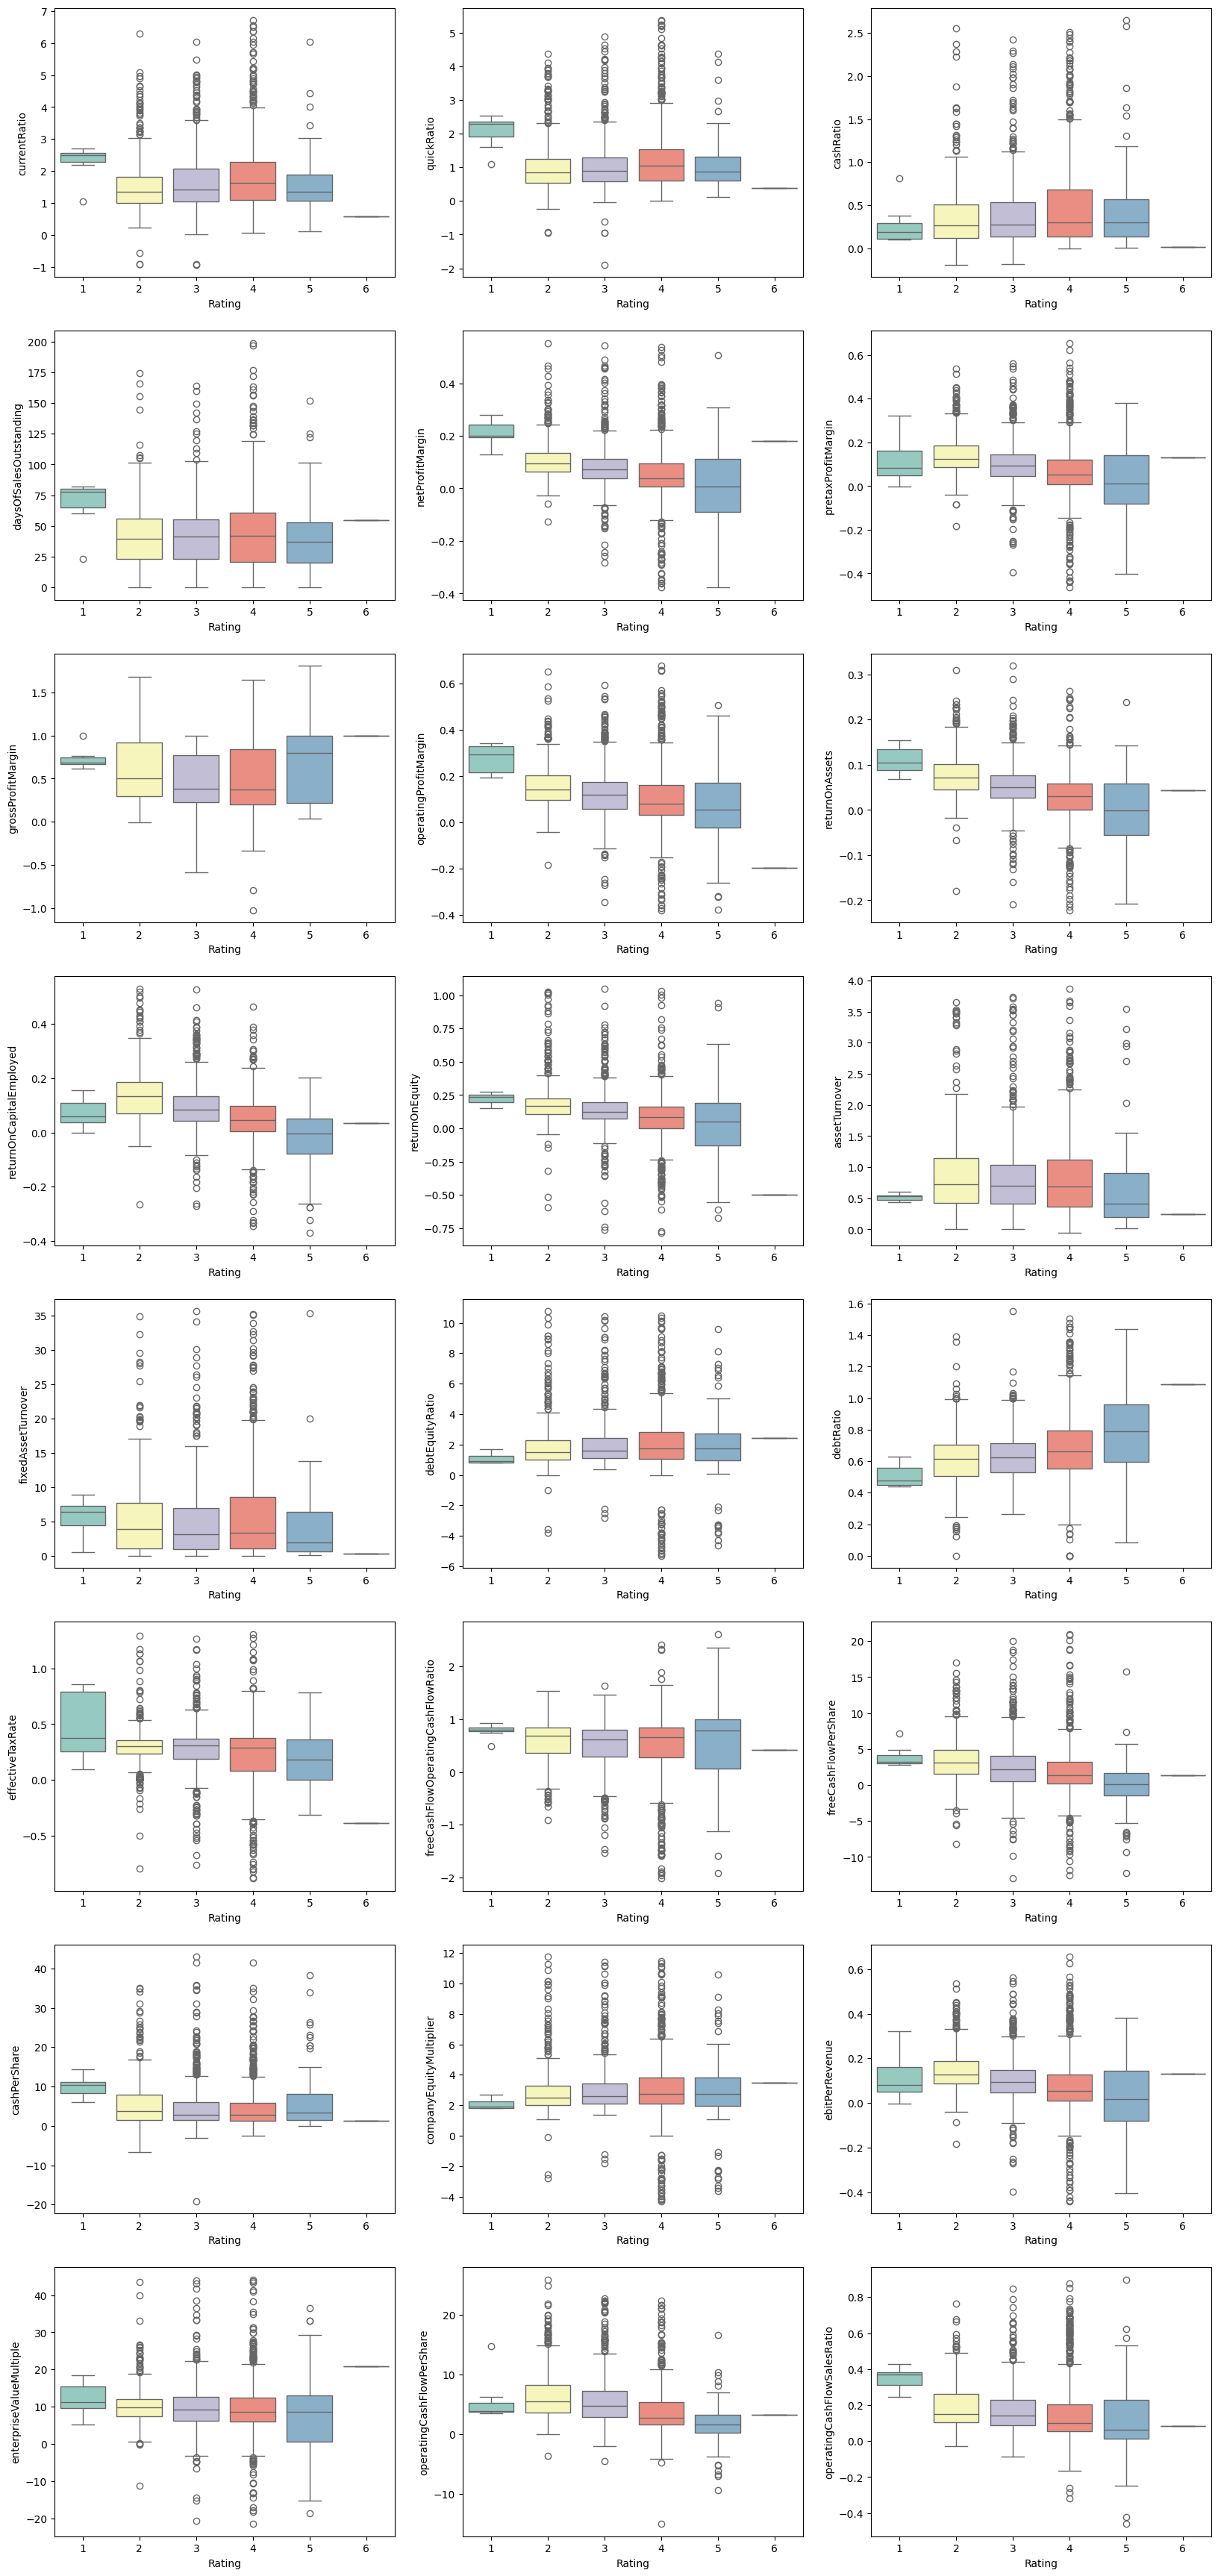

In [ ]:
# since the outlier is large, we can not observe the data pattern very well,
# we use upper and lower quantile to represent all the outlier located outside the middle interval
# filter out the outliers
# 1 represents the lowest risk while 6 represents the highest risk. 
df_rating_no_out = df1.copy()
for c in df_rating_no_out.columns[6:31]:

    q05 = df_rating_no_out[c].quantile(0.10)
    q95 = df_rating_no_out[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df_rating_no_out.loc[df_rating_no_out[c] > fence_high,c] = df_rating_no_out[c].quantile(0.25)
    df_rating_no_out.loc[df_rating_no_out[c] < fence_low,c] = df_rating_no_out[c].quantile(0.75)

box_distribution = box_distribution(df_rating_no_out)

The plots above display a series of boxplots that analyze the distribution of 25 financial indicators against the Rating variable. Each subplot compares how these financial features behave across the different rating categories, revealing insights into their spread, central tendency, and presence of outliers.

As can be seen, Companies with lower credit risk (Lowest Risk and Low Risk) exhibit higher liquidity ratios (currentRatio, quickRatio), positive profitability (netProfitMargin, grossProfitMargin), lower debt levels (debtRatio, debtEquityRatio), and efficient operational performance (returnOnAssets, assetTurnover), reflecting strong financial health. 

In contrast, high-risk companies (In Default and Highest Risk) show lower liquidity, negative or near-zero profitability, higher debt burdens, and delayed cash recovery cycles (e.g., elevated daysOfSalesOutstanding), with broader spreads and more extreme outliers across financial indicators. 

These patterns highlight that liquidity, profitability, and debt management are key differentiators of credit risk, with features like currentRatio, netProfitMargin, debtRatio, and daysOfSalesOutstanding being particularly indicative of a company's financial stability. 

**Overview and What's next**

To conclude, the EDA revealed that while the dataset is complete and well-structured, outliers and skewed distributions significantly impact numerical features. Ratings are highly imbalanced. Relationships between predictors provide insights into the interdependence of financial ratios, which will guide feature selection.

We can further preprocess the data by encoding the categorical data, capping the outliers for the numerical data with quantile-based method and use log transformation to mitigate the skewness. Also, we may remove some highly related predictors for better model training.